## Problem: TAYLOR_SERIES
+ **Find square-root of 10:**
\begin{equation}  \sqrt{10} = ?  \end{equation}

+ **Polynomial equation:**
\begin{equation} [ \sqrt{x} = f(x)] --->(1) \end{equation}

In [1]:
import numpy as np
import scipy as sp
from sympy import *
import numpy.polynomial.polynomial as root
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

### Defining function and its derivative:

#### Taylor-series Method:
+ Taylor_series expansion about $x_0$:
\begin{equation} f(x_0+h) = f(x_0) + \frac{h*f'(x_0)}{1!} + \frac{h^2*f"(x_0)}{2!} + ...  \end{equation}

+ By considering $x_0 = 9$ and $h = 1$
\begin{equation} f(9+1)= f(10) = \sqrt{10}= f(9) + \frac{1*f'(9)}{1!} + \frac{1^2*f"(9)}{2!} + ...  \end{equation}

### Defining functions:
+ Using simpy.diff()--> symbolic differentiation

#### Max_iteration condition:

In [2]:
def SolveTS(fun, p, h, n):
    temp1 = 1
    temp2 = 0
    temp3 = 0
    store = []
    error = []
    df2 = 0
    df2 = diff(fun,x,0)
    df2 = lambdify(x,df2)
    temp2 = df2(p)
    for i in range(1,n+1,1):
        df = 0
        df = diff(fun,x,i)                     # diff(fun, diff_about, i:take derivative i times)-->to find derivatives
        df = lambdify(x,df)                   # lambdify(i/p_var, diff_symbolic_function)--->converting into evaluatable func.
        temp1 = temp1*i                       # product_incrementor for factorial
        df1 = (df(p)/temp1)*(h**i)
        temp2 = df1 + temp2
        store.append(temp2)
        error.append(np.abs(temp2-temp3))
        temp3 = temp2
    return(store,error)

#### Max_Error condition:

In [3]:
def solveTS(fun, p, h, e_max):
    temp1 = 1
    temp2 = 0
    temp3 = 0
    e = 1
    store = []
    error = []
    df2 = 0
    df2 = diff(fun,x,0)
    df2 = lambdify(x,df2)
    temp2 = df2(p)
    i   = 0
    while(e>e_max):
        i+=1
        df = 0
        df = diff(fun,x,i)                     # diff(fun, diff_about, i:take derivative i times)-->to find derivatives
        df = lambdify(x,df)                   # lambdify(i/p_var, diff_symbolic_function)--->converting into evaluatable func.
        temp1 = temp1*i                       # product_incrementor for factorial
        df1 = (df(p)/temp1)*(h**i)
        temp2 = df1 + temp2
        store.append(temp2)
        e = np.abs(temp2-temp3)
        error.append(e)
        temp3 = temp2
    return(store,error)

### Solving:

#### Max_iteration condition:

In [23]:
x = symbols('X')                           # x,y,z= symbols('x','y','z'), for more variables
function_symbolic = x**0.5                 # Symbolic_function: cannot be used for evaluating at some x: no input possible!
x0       = 9                               # expand taylor_series about x0 = 9
Δx       = 1                               # Δx+x0 = 10;
max_iter = 10

ss, error = SolveTS(function_symbolic, x0, Δx, max_iter)
ss2, error2 = SolveTS(function_symbolic, 9.9, 0.1, max_iter)
ss3, error3 = SolveTS(function_symbolic, 9.99, 0.01, max_iter)

In [34]:
dict1 = {"x_h=1":ss,"errors": error, "x_h=0.1":ss2, "error2":error2, "x_h=0.01":ss3, "error3":error3}
df = pd.DataFrame(dict1,index=(np.arange(1,max_iter+1,1)))
ERROR_I = np.abs(ss[len(ss)-1]-mt.sqrt(10))


print(df)
print("\nMAX_ITERATIONS:", ERROR_I)
print("Converged sol: ", ss[len(ss)-1])
print("Excat sol:     ", mt.sqrt(10))

       x_h=1        errors   x_h=0.1        error2  x_h=0.01        error3
1   3.166667  3.166667e+00  3.162318  3.162318e+00  3.162278  3.162278e+00
2   3.162037  4.629630e-03  3.162277  4.012890e-05  3.162278  3.958784e-07
3   3.162294  2.572016e-04  3.162278  2.026712e-07  3.162278  1.981375e-10
4   3.162276  1.786123e-05  3.162278  1.279490e-09  3.162278  1.239009e-13
5   3.162278  1.389206e-06  3.162278  9.046985e-12  3.162278  0.000000e+00
6   3.162278  1.157672e-07  3.162278  6.838974e-14  3.162278  0.000000e+00
7   3.162278  1.010666e-08  3.162278  4.440892e-16  3.162278  0.000000e+00
8   3.162278  9.124070e-10  3.162278  0.000000e+00  3.162278  0.000000e+00
9   3.162278  8.448220e-11  3.162278  0.000000e+00  3.162278  0.000000e+00
10  3.162278  7.978951e-12  3.162278  0.000000e+00  3.162278  0.000000e+00

MAX_ITERATIONS: 6.985523270941485e-13
Converged sol:  3.162277660167681
Excat sol:      3.1622776601683795


#### Max_Error condition:

In [24]:
x = symbols('X')                           # x,y,z= symbols('x','y','z'), for more variables
function_symbolic = x**0.5                 # Symbolic_function: cannot be used for evaluating at some x: no input possible!
x0       = 9                               # expand taylor_series about x0 = 9
Δx       = 1                               # Δx+x0 = 10
max_error = 1e-10
ss4, error4 =solveTS(function_symbolic, x0, Δx, max_error)
ss5, error5 = solveTS(function_symbolic, 9.9, 0.1, max_error)
ss6, error6 = solveTS(function_symbolic, 9.99, 0.01, max_error)

In [42]:
dict2 = {"x_h=1":ss4, "error4":error4}
dict3 ={ "x_h=0.1":ss5, "error5":error5}
dict4 = { "x_h=0.01":ss6, "error6":error6}
df2 = pd.DataFrame(dict2)
df3 = pd.DataFrame(dict3)
df4 = pd.DataFrame(dict4)
ERROR1 = np.abs(ss4[len(ss4)-1]-mt.sqrt(10))
ERROR2 = np.abs(ss5[len(ss5)-1]-mt.sqrt(10))
ERROR3 = np.abs(ss6[len(ss6)-1]-mt.sqrt(10))

print("\nMAX_ERROR:     ", ERROR1)
print("Converged sol: ", ss4[len(ss4)-1])
print("Excat sol:     ", mt.sqrt(10))
print('\n' ,df2)
print("\nMAX_ERROR:    " , ERROR2)
print("Converged sol: ", ss5[len(ss5)-1])
print("Excat sol:     ", mt.sqrt(10))
print('\n',df3)
print("\nMAX_ERROR:    " , ERROR3)
print("Converged sol: ", ss6[len(ss6)-1])
print("Excat sol:     ", mt.sqrt(10))
print('\n',df4)


MAX_ERROR:      7.280398506281927e-12
Converged sol:  3.16227766017566
Excat sol:      3.1622776601683795

       x_h=1        error4
0  3.166667  3.166667e+00
1  3.162037  4.629630e-03
2  3.162294  2.572016e-04
3  3.162276  1.786123e-05
4  3.162278  1.389206e-06
5  3.162278  1.157672e-07
6  3.162278  1.010666e-08
7  3.162278  9.124070e-10
8  3.162278  8.448220e-11

MAX_ERROR:     6.794564910705958e-14
Converged sol:  3.1622776601684475
Excat sol:      3.1622776601683795

     x_h=0.1        error5
0  3.162318  3.162318e+00
1  3.162277  4.012890e-05
2  3.162278  2.026712e-07
3  3.162278  1.279490e-09
4  3.162278  9.046985e-12

MAX_ERROR:     4.440892098500626e-16
Converged sol:  3.162277660168379
Excat sol:      3.1622776601683795

    x_h=0.01        error6
0  3.162278  3.162278e+00
1  3.162278  3.958784e-07
2  3.162278  1.981375e-10
3  3.162278  1.239009e-13


### Plotting:

In [8]:
%matplotlib inline
%config InlineBackend.fig_format = 'svg'

#### Max_iteration condition:

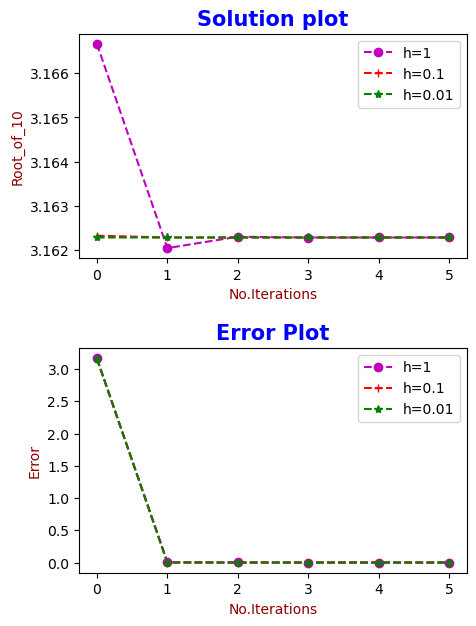

In [9]:
plt.figure(figsize=(5,7))

# Solution-plot
fig1 = plt.subplot(2,1,1)
plt.plot(np.arange(0,max_iter,1),ss, "m--o", label ="h=1")
plt.plot(np.arange(0,max_iter,1),ss2, "r--+", label ="h=0.1")
plt.plot(np.arange(0,max_iter,1),ss3, "g--*", label="h=0.01")
plt.title("Solution plot", fontweight ="bold", fontsize=15, color="blue")
plt.ylabel("Root_of_10", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.subplots_adjust(hspace=0.4)
plt.legend()

# Error-plot
plt.subplot(2,1,2)
plt.plot(np.arange(0,max_iter,1),error,"m--o",label="h=1")
plt.plot(np.arange(0,max_iter,1),error2,"r--+",label="h=0.1")
plt.plot(np.arange(0,max_iter,1),error3,"g--*",label="h=0.01")
plt.title("Error Plot", fontweight ="bold", fontsize=15,color = "blue")
plt.ylabel("Error", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.legend()

#### Max_Error condition:

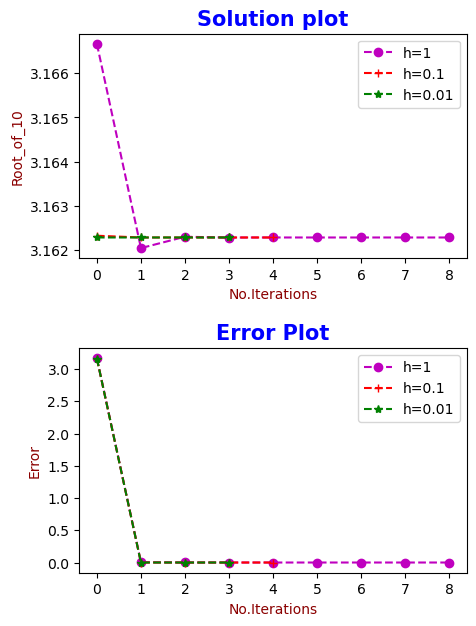

In [10]:
plt.figure(figsize=(5,7))

# Solution-plot
fig1 = plt.subplot(2,1,1)
plt.plot(np.arange(0,len(ss4),1),ss4, "m--o", label ="h=1")
plt.plot(np.arange(0,len(ss5),1),ss5, "r--+", label ="h=0.1")
plt.plot(np.arange(0,len(ss6),1),ss6, "g--*", label="h=0.01")
plt.title("Solution plot", fontweight ="bold", fontsize=15, color="blue")
plt.ylabel("Root_of_10", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.subplots_adjust(hspace=0.4)
plt.legend()

# Error-plot
plt.subplot(2,1,2)
plt.plot(np.arange(0,len(ss4),1),error4,"m--o",label="h=1")
plt.plot(np.arange(0,len(ss5),1),error5,"r--+",label="h=0.1")
plt.plot(np.arange(0,len(ss6),1),error6,"g--*",label="h=0.01")
plt.title("Error Plot", fontweight ="bold", fontsize=15,color = "blue")
plt.ylabel("Error", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.legend()